# ReEDS Scenarios on PV ICE Tool STATES

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. ReEDS installation projections are used in this journal as input data to the PV ICE tool. 

Current sections include:

<ol>
    <li> ### Reading a standard ReEDS output file and saving it in a PV ICE input format </li>
<li>### Reading scenarios of interest and running PV ICE tool </li>
<li>###Plotting </li>
<li>### GeoPlotting.</li>
</ol>
    Notes:
   
Scenarios of Interest:
	the Ref.Mod, 
o	95-by-35.Adv, and 
o	95-by-35+Elec.Adv+DR ones


In [1]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
from IPython.display import display
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


### Reading REEDS original file to get list of SCENARIOs, PCAs, and STATEs 

In [3]:
reedsFile = str(Path().resolve().parent.parent.parent / 'December Core Scenarios ReEDS Outputs Solar Futures v2a.xlsx')
print ("Input file is stored in %s" % reedsFile)

rawdf = pd.read_excel(reedsFile,
                        sheet_name="UPV Capacity (GW)")
                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels
#now set year as an index in place
#rawdf.drop(columns=['State'], inplace=True)
rawdf.drop(columns=['Tech'], inplace=True)
rawdf.set_index(['Scenario','Year','PCA', 'State'], inplace=True)

Input file is stored in C:\Users\sayala\Documents\GitHub\December Core Scenarios ReEDS Outputs Solar Futures v2a.xlsx


In [4]:
scenarios = list(rawdf.index.get_level_values('Scenario').unique())
PCAs = list(rawdf.index.get_level_values('PCA').unique())
STATEs = list(rawdf.index.get_level_values('State').unique())

### Reading GIS inputs

In [5]:
GISfile = str(Path().resolve().parent.parent.parent / 'gis_centroid_n.xlsx')
GIS = pd.read_excel(GISfile)
GIS = GIS.set_index('id')

In [6]:
GIS.head()

,long,lat,country
id,,,
p1,-121.452252,47.820991,USA
p10,-117.159039,35.120104,USA
p100,-78.257714,38.791108,USA
p101,-82.192477,28.708695,USA
p102,-80.563731,26.677092,USA


In [7]:
GIS.loc['p1'].long

-121.4522522

### Create Scenarios in PV_ICE

#### Rename difficult characters from Scenarios Names

In [8]:
simulationname = scenarios
simulationname = [w.replace('+', '_') for w in simulationname]
simulationname

['Reference.Mod',
 'Reference.Adv',
 'Reference.Adv_DR',
 '95-by-35.Mod',
 '95-by-35.Adv',
 '95-by-35.Adv_DR',
 '95-by-35_Elec.Mod',
 '95-by-35_Elec.Adv',
 '95-by-35_Elec.Adv_DR']

#### Downselect to Solar Future scenarios of interest

Scenarios of Interest:
<li> Ref.Mod
<li> 95-by-35.Adv  
<li> 95-by-35+Elec.Adv+DR 

In [9]:
SFscenarios = [simulationname[0], simulationname[4], simulationname[8]]
SFscenarios

['Reference.Mod', '95-by-35.Adv', '95-by-35_Elec.Adv_DR']

#### Create the 3 Scenarios and assign Baselines

Keeping track of each scenario as its own PV ICE Object.

In [10]:
#for ii in range (0, 1): #len(scenarios):
i = 0
r1 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)    
    r1.createScenario(name=STATEs[jj], file=filetitle)
    r1.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')


i = 1
r2 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)        
    r2.createScenario(name=STATEs[jj], file=filetitle)
    r2.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')


i = 2
r3 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)
for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)        
    r3.createScenario(name=STATEs[jj], file=filetitle)
    r3.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


# 2 FINISH: Set characteristics of Recycling to SF values.

#### Calculate Mass Flow

In [11]:
IRENA= False
ELorRL = 'EL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49}  # Regular-loss scenario IRENA
    r1.calculateMassFlow(weibullInputParams=weibullInputParams, weibullAlphaOnly=True)
    r2.calculateMassFlow(weibullInputParams=weibullInputParams, weibullAlphaOnly=True)
    r3.calculateMassFlow(weibullInputParams=weibullInputParams, weibullAlphaOnly=True)
    title_Method = 'Irena_'+ELorRL
else:
    r1.calculateMassFlow()
    r2.calculateMassFlow()
    r3.calculateMassFlow()
    title_Method = 'PVICE'


Working on Scenario:  WA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  VA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  FL
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Materia

==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  IA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WI
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  TX
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  OK
********************
Finished Area+Power Generation Calculations
==> Working on Mater

Working on Scenario:  VT
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  NH
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  MA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CT
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Materia

==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  NC
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  VA
********************
Finished Area+Power Generation Calculations
==> Working on Mater

Working on Scenario:  NE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  MN
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  IA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WI
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Materia

In [12]:
print("PCAs:", r1.scenario.keys())
print("Module Keys:", r1.scenario[STATEs[jj]].data.keys())
print("Material Keys: ", r1.scenario[STATEs[jj]].material['glass'].materialdata.keys())

PCAs: dict_keys(['WA', 'CA', 'VA', 'FL', 'MI', 'IN', 'KY', 'OH', 'PA', 'WV', 'NV', 'MD', 'DE', 'NJ', 'NY', 'VT', 'NH', 'MA', 'CT', 'RI', 'ME', 'ID', 'MT', 'WY', 'UT', 'AZ', 'NM', 'SD', 'CO', 'ND', 'NE', 'MN', 'IA', 'WI', 'TX', 'OK', 'OR', 'KS', 'MO', 'AR', 'LA', 'IL', 'MS', 'AL', 'TN', 'GA', 'SC', 'NC'])
Module Keys: Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing', 'Area',
       'Cumulative_Area_disposedby_Failure',
       'Cumulative_Area_disposedby_ProjectLifetime',
       'Cumulative_Area_disposed', 'Cumulative_Active_Area',
       'Installed_Capacity_[W]', 'WeibullParams', 'EOL_on_Year_0',
       'EOL_on_Year_1', 'EOL_on_Year_2', 'EOL_on_Year_3', 'EOL_on_Year_4',
       'EOL_on_Year_5', 'EOL_on_Year_6', 'EOL_on_Year_7', 'EOL_on_Year_8',
       'EOL_on_Year_9', 'EOL_on_

In [13]:
"""
r1.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')
"""
pass

## Aggregating PCAs Material Landfilled to obtain US totals by Year

In [14]:
### Singe Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
#keyword='new_Installed_Capacity_[MW]'

plt.figure()
plt.plot(r1.scenario[PCAs[0]].data['year'], foo, label=PCAs[12])
plt.title(keyword)
plt.legend()

for jj in range (1, len(PCAs)): 
    foo['silver'] += r1.scenario[PCAs[jj]].material['silver'].materialdata[keyword]


fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(r1.scenario[PCAs[0]].data['year'], foo['silver'], label='US')
plt.title("Material Landfilled per Year US")
#ax.set_yscale('log')
print(max(foo))
"""
pass

In [15]:
### Verbose Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearlyWASTE=pd.DataFrame()

# Loop over Materials
for ii in range (0, len(materials)):    
    material = materials[ii]
    foo1 = r1.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo1 = foo1.to_frame(name=material)
    foo2 = r2.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo2 = foo2.to_frame(name=material)
    foo3 = r3.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo3 = foo3.to_frame(name=material)

    USyearlyWASTE[r1.name + '_' + material] = foo1[material]
    USyearlyWASTE[r2.name + '_' + material] = foo2[material]
    USyearlyWASTE[r3.name + '_' + material] = foo3[material]

    # Loop over PCAs
    for jj in range (1, len(PCAs)): 
        USyearlyWASTE[r1.name + '_' + material] += r1.scenario[PCAs[jj]].material[material].materialdata[keyword]
        USyearlyWASTE[r2.name + '_' + material] += r2.scenario[PCAs[jj]].material[material].materialdata[keyword]
        USyearlyWASTE[r3.name + '_' + material] += r3.scenario[PCAs[jj]].material[material].materialdata[keyword]

# Converting to grams to Tons. 
USyearlyWASTE.head(20)
"""
pass

In [16]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearly=pd.DataFrame()

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[STATEs[0]].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["Waste_"+material+'_'+obj.name] = foo[material]

        # Loop over STATEs
        for jj in range (1, len(STATEs)): 
            USyearly["Waste_"+material+'_'+obj.name] += obj.scenario[STATEs[jj]].material[material].materialdata[keyword]

    filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name)) ]
    USyearly['Waste_Module_'+obj.name] = USyearly[filter_col].sum(axis=1)
    
# Converting to grams to Tons. 
USyearly.head(20)

,Waste_glass_Reference.Mod,Waste_silicon_Reference.Mod,Waste_silver_Reference.Mod,Waste_copper_Reference.Mod,Waste_aluminum_Reference.Mod,Waste_Module_Reference.Mod,Waste_glass_95-by-35.Adv,Waste_silicon_95-by-35.Adv,Waste_silver_95-by-35.Adv,Waste_copper_95-by-35.Adv,Waste_aluminum_95-by-35.Adv,Waste_Module_95-by-35.Adv,Waste_glass_95-by-35_Elec.Adv_DR,Waste_silicon_95-by-35_Elec.Adv_DR,Waste_silver_95-by-35_Elec.Adv_DR,Waste_copper_95-by-35_Elec.Adv_DR,Waste_aluminum_95-by-35_Elec.Adv_DR,Waste_Module_95-by-35_Elec.Adv_DR
0,1.903190e+09,6.746379e+08,5.187865e+06,5.490490e+05,2.171260e+07,2.605277e+09,1.903190e+09,6.746379e+08,5.187865e+06,5.490490e+05,2.171260e+07,2.605277e+09,1.903190e+09,6.746379e+08,5.187865e+06,5.490490e+05,2.171260e+07,2.605277e+09
1,1.758924e+09,3.121942e+08,2.431986e+06,5.345047e+05,2.113743e+07,2.095222e+09,1.758924e+09,3.121942e+08,2.431986e+06,5.345047e+05,2.113743e+07,2.095222e+09,1.758924e+09,3.121942e+08,2.431986e+06,5.345047e+05,2.113743e+07,2.095222e+09
2,2.126745e+10,3.727208e+09,2.450464e+07,6.462789e+06,2.555764e+08,2.528120e+10,2.126745e+10,3.727208e+09,2.450464e+07,6.462789e+06,2.555764e+08,2.528120e+10,2.126745e+10,3.727208e+09,2.450464e+07,6.462789e+06,2.555764e+08,2.528120e+10
3,2.046992e+10,3.733269e+09,1.886858e+07,6.220436e+06,2.459927e+08,2.447428e+10,2.046992e+10,3.733269e+09,1.886858e+07,6.220436e+06,2.459927e+08,2.447428e+10,2.046992e+10,3.733269e+09,1.886858e+07,6.220436e+06,2.459927e+08,2.447428e+10
4,6.602831e+10,1.184755e+10,4.406014e+07,2.075053e+07,8.205997e+08,7.876127e+10,6.602831e+10,1.184755e+10,4.406014e+07,2.075053e+07,8.205997e+08,7.876127e+10,6.602831e+10,1.184755e+10,4.406014e+07,2.075053e+07,8.205997e+08,7.876127e+10
5,6.455100e+10,1.126628e+10,3.922866e+07,1.989618e+07,7.868268e+08,7.666323e+10,6.455100e+10,1.126628e+10,3.922866e+07,1.989618e+07,7.868268e+08,7.666323e+10,6.455100e+10,1.126628e+10,3.922866e+07,1.989618e+07,7.868268e+08,7.666323e+10
6,1.374694e+11,2.507173e+10,7.504569e+07,4.843076e+07,1.778925e+09,1.644435e+11,1.374694e+11,2.507173e+10,7.504569e+07,4.843076e+07,1.778925e+09,1.644435e+11,1.374694e+11,2.507173e+10,7.504569e+07,4.843076e+07,1.778925e+09,1.644435e+11
7,1.278064e+11,2.216979e+10,6.730195e+07,5.129430e+07,1.759038e+09,1.518539e+11,1.278064e+11,2.216979e+10,6.730195e+07,5.129430e+07,1.759038e+09,1.518539e+11,1.278064e+11,2.216979e+10,6.730195e+07,5.129430e+07,1.759038e+09,1.518539e+11
8,1.717057e+11,2.510179e+10,9.557032e+07,8.505280e+07,2.510807e+09,1.994989e+11,1.717057e+11,2.510179e+10,9.557032e+07,8.505280e+07,2.510807e+09,1.994989e+11,1.717057e+11,2.510179e+10,9.557032e+07,8.505280e+07,2.510807e+09,1.994989e+11
9,1.750658e+11,1.984211e+10,9.685514e+07,8.435522e+07,2.407646e+09,1.974967e+11,1.750658e+11,1.984211e+10,9.685514e+07,8.435522e+07,2.407646e+09,1.974967e+11,1.750658e+11,1.984211e+10,9.685514e+07,8.435522e+07,2.407646e+09,1.974967e+11


In [17]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[STATEs[0]].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["VirginStock_"+material+'_'+obj.name] = foo[material]

        # Loop over STATEs
        for jj in range (1, len(STATEs)): 
            USyearly["VirginStock_"+material+'_'+obj.name] += obj.scenario[STATEs[jj]].material[material].materialdata[keyword]
            
    filter_col = [col for col in USyearly if (col.startswith('VirginStock_') and col.endswith(obj.name)) ]
    USyearly['VirginStock_Module_'+obj.name] = USyearly[filter_col].sum(axis=1)


### Converting to grams to METRIC Tons. 


In [18]:
USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons


### Adding Installed Capacity to US

In [19]:
keyword='Installed_Capacity_[W]'

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    foo = obj.scenario[STATEs[0]].data[keyword]
    foo = foo.to_frame(name=keyword)
    USyearly["Capacity_"+obj.name] = foo[keyword]

    # Loop over STATEs
    for jj in range (1, len(STATEs)): 
        USyearly["Capacity_"+obj.name] += obj.scenario[STATEs[jj]].data[keyword]

USyearly.head(20)

,Waste_glass_Reference.Mod,Waste_silicon_Reference.Mod,Waste_silver_Reference.Mod,Waste_copper_Reference.Mod,Waste_aluminum_Reference.Mod,Waste_Module_Reference.Mod,Waste_glass_95-by-35.Adv,Waste_silicon_95-by-35.Adv,Waste_silver_95-by-35.Adv,Waste_copper_95-by-35.Adv,...,VirginStock_Module_95-by-35.Adv,VirginStock_glass_95-by-35_Elec.Adv_DR,VirginStock_silicon_95-by-35_Elec.Adv_DR,VirginStock_silver_95-by-35_Elec.Adv_DR,VirginStock_copper_95-by-35_Elec.Adv_DR,VirginStock_aluminum_95-by-35_Elec.Adv_DR,VirginStock_Module_95-by-35_Elec.Adv_DR,Capacity_Reference.Mod,Capacity_95-by-35.Adv,Capacity_95-by-35_Elec.Adv_DR
0,1903.189510,674.637919,5.187865,0.549049,21.712603,2605.276945,1.903190e+03,674.637919,5.187865,0.549049,...,9.239700e+03,7.519516e+03,968.947470,23.160109,4.323220,723.753419,9.239700e+03,1.039020e+08,1.039020e+08,1.039020e+08
1,1758.923594,312.194212,2.431986,0.534505,21.137435,2095.221732,1.758924e+03,312.194212,2.431986,0.534505,...,8.544828e+03,7.226473e+03,598.707484,10.857081,4.208698,704.581143,8.544828e+03,2.070834e+08,2.070834e+08,2.070834e+08
2,21267.450311,3727.207711,24.504640,6.462789,255.576412,25281.201862,2.126745e+04,3727.207711,24.504640,6.462789,...,1.032475e+05,8.737654e+04,7191.489335,109.395709,50.888097,8519.212746,1.032475e+05,1.486954e+09,1.486954e+09,1.486954e+09
3,20469.924318,3733.268996,18.868583,6.220436,245.992721,24474.275053,2.046992e+04,3733.268996,18.868583,6.220436,...,9.950052e+04,8.409992e+04,7067.639881,84.234696,48.979794,8199.742268,9.950052e+04,2.758626e+09,2.758626e+09,2.758626e+09
4,66028.314733,11847.545835,44.060143,20.750526,820.599747,78761.270984,6.602831e+04,11847.545835,44.060143,20.750526,...,3.332182e+05,2.825344e+05,22970.545291,196.696711,163.389821,27353.206628,3.332182e+05,7.097585e+09,7.097585e+09,7.097585e+09
5,64550.995579,11266.279203,39.228662,19.896181,786.826791,76663.226416,6.455100e+04,11266.279203,39.228662,19.896181,...,3.247023e+05,2.762124e+05,21931.265906,175.126189,156.662005,26226.898120,3.247023e+05,1.141307e+10,1.141307e+10,1.141307e+10
6,137469.376524,25071.727429,75.045690,48.430762,1778.924806,164443.505211,1.374694e+05,25071.727429,75.045690,48.430762,...,7.228940e+05,6.136995e+05,49183.465207,335.018610,381.340954,59294.639175,7.228940e+05,2.148921e+10,2.148921e+10,2.148921e+10
7,127806.430294,22169.792146,67.301946,51.294303,1759.038261,151853.856950,1.278064e+05,22169.792146,67.301946,51.294303,...,7.017170e+05,5.963791e+05,46008.991071,300.433490,403.879498,58624.643252,7.017170e+05,3.151968e+10,3.151968e+10,3.151968e+10
8,171705.666420,25101.788307,95.570321,85.052795,2510.806905,199498.884748,1.717057e+05,25101.788307,95.570321,85.052795,...,9.830747e+05,8.391915e+05,59122.863457,426.593763,669.669607,83664.080009,9.830747e+05,4.641201e+10,4.641201e+10,4.641201e+10
9,175065.762679,19842.110712,96.855139,84.355218,2407.645886,197496.729633,1.750658e+05,19842.110712,96.855139,84.355218,...,9.886276e+05,8.555587e+05,51794.462430,432.243401,664.116791,80178.076675,9.886276e+05,6.124645e+10,6.124645e+10,6.124645e+10


### Creative Cumulative DataFrame and Saving

In [20]:
USyearly.index = obj.scenario[STATEs[0]].data['year']

In [21]:
UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()

,Waste_glass_Reference.Mod,Waste_silicon_Reference.Mod,Waste_silver_Reference.Mod,Waste_copper_Reference.Mod,Waste_aluminum_Reference.Mod,Waste_Module_Reference.Mod,Waste_glass_95-by-35.Adv,Waste_silicon_95-by-35.Adv,Waste_silver_95-by-35.Adv,Waste_copper_95-by-35.Adv,...,VirginStock_Module_95-by-35.Adv,VirginStock_glass_95-by-35_Elec.Adv_DR,VirginStock_silicon_95-by-35_Elec.Adv_DR,VirginStock_silver_95-by-35_Elec.Adv_DR,VirginStock_copper_95-by-35_Elec.Adv_DR,VirginStock_aluminum_95-by-35_Elec.Adv_DR,VirginStock_Module_95-by-35_Elec.Adv_DR,Capacity_Reference.Mod,Capacity_95-by-35.Adv,Capacity_95-by-35_Elec.Adv_DR
year,,,,,,,,,,,,,,,,,,,,,
2009,1903.189510,674.637919,5.187865,0.549049,21.712603,2605.276945,1903.189510,674.637919,5.187865,0.549049,...,9239.700260,7519.516040,968.947470,23.160109,4.323220,723.753419,9239.700260,1.039020e+08,1.039020e+08,1.039020e+08
2010,3662.113104,986.832132,7.619851,1.083554,42.850037,4700.498677,3662.113104,986.832132,7.619851,1.083554,...,17784.527926,14745.989301,1567.654954,34.017191,8.531918,1428.334562,17784.527926,3.109855e+08,3.109855e+08,3.109855e+08
2011,24929.563415,4714.039843,32.124490,7.546342,298.426449,29981.700539,24929.563415,4714.039843,32.124490,7.546342,...,121032.054799,102122.530286,8759.144289,143.412900,59.420016,9947.547308,121032.054799,1.797940e+09,1.797940e+09,1.797940e+09
2012,45399.487733,8447.308838,50.993073,13.766778,544.419169,54455.975592,45399.487733,8447.308838,50.993073,13.766778,...,220532.572135,186222.450984,15826.784170,227.647596,108.399810,18147.289576,220532.572135,4.556565e+09,4.556565e+09,4.556565e+09
2013,111427.802465,20294.854673,95.053217,34.517305,1365.018916,133217.246576,111427.802465,20294.854673,95.053217,34.517305,...,553750.798039,468756.838435,38797.329461,424.344307,271.789631,45500.496204,553750.798039,1.165415e+10,1.165415e+10,1.165415e+10


In [22]:

USyearly.to_csv(title_Method+' US_Yearly.csv')
UScum.to_csv(title_Method+' US_Cumulative.csv')


# PLOTTING GALORE

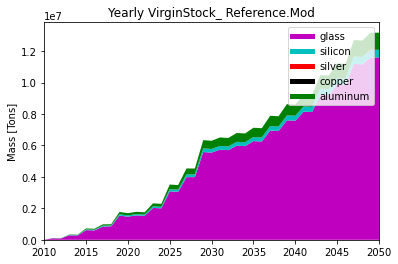

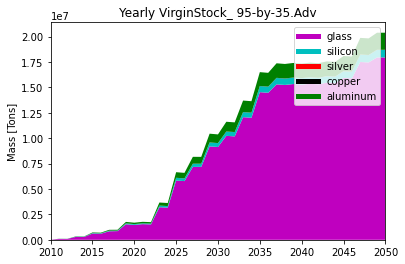

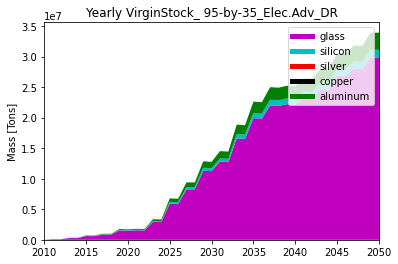

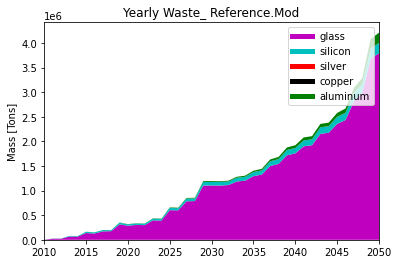

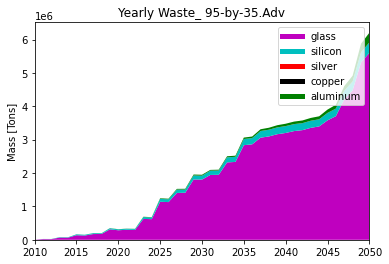

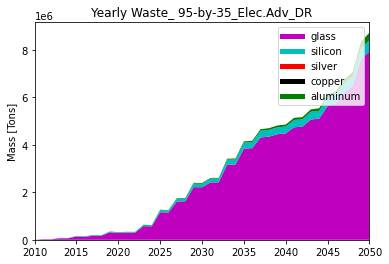

In [23]:
keywords=['VirginStock_', 'Waste_', 'Capacity']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        obj = SFScenarios[kk]
        plt.figure()
        plt.plot([],[],color='m', label='glass', linewidth=5)
        plt.plot([],[],color='c', label='silicon', linewidth=5)
        plt.plot([],[],color='r', label='silver', linewidth=5)
        plt.plot([],[],color='k', label='copper', linewidth=5)
        plt.plot([],[],color='g', label='aluminum', linewidth=5)

        plt.stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['m','c','r','k', 'g'])
        plt.ylabel('Mass [Tons]')
        plt.xlim([2010, 2050])
        plt.title('Yearly '+keyw+ ' ' + obj.name)
        plt.legend(materials)


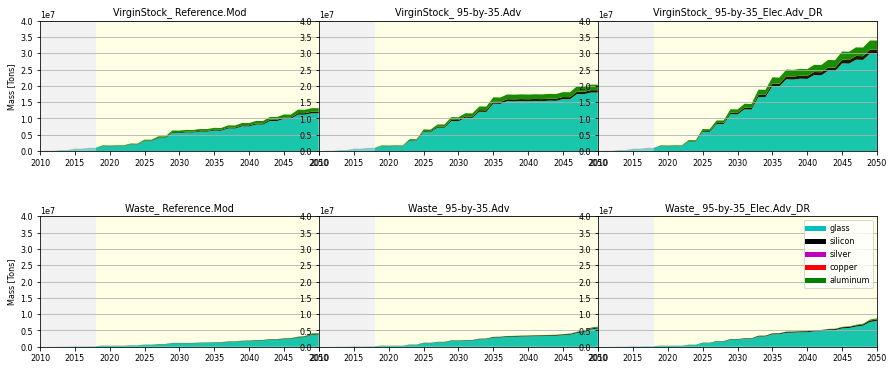

In [24]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 
       
for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([0, 4e7])

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
        

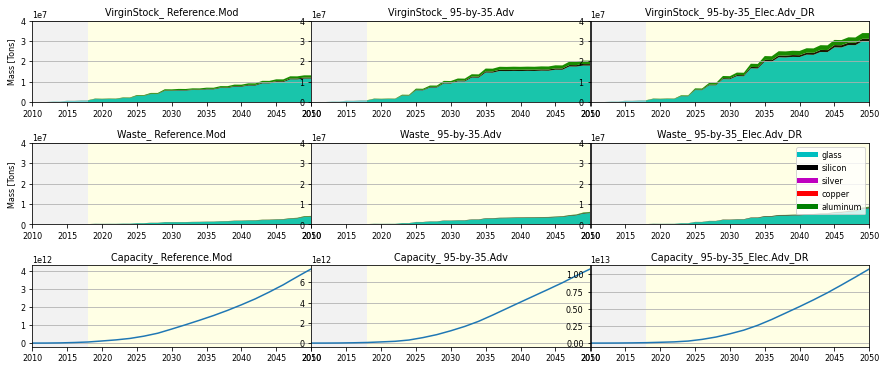

In [25]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

        
# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+obj.name])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 




for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([0, 4e7])

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
        

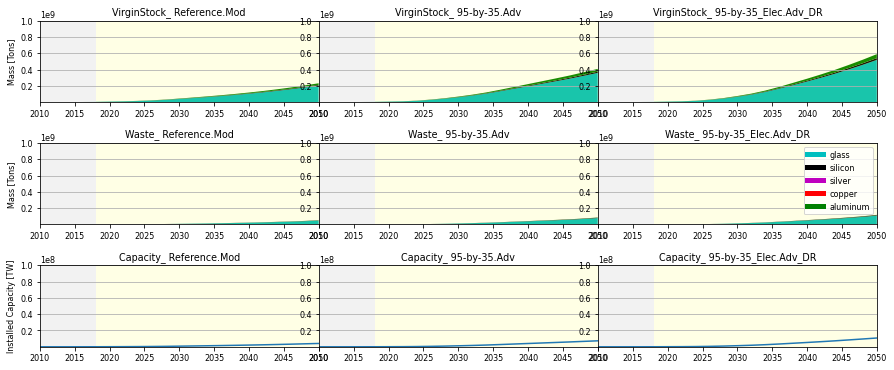

In [26]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

    
fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], UScum[keyw+materials[0]+'_'+obj.name], 
                                                          UScum[keyw+materials[1]+'_'+obj.name], 
                                                          UScum[keyw+materials[2]+'_'+obj.name], 
                                                          UScum[keyw+materials[3]+'_'+obj.name], 
                                                          UScum[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+obj.name]/1e6)
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([1e0, 10e8])
    axs[i+3].set_ylim([1e0, 10e8])
    axs[i+6].set_ylim([1e0, 10e7])

  #  axs[i].set_yscale('log')
  #  axs[i+3].set_yscale('log')
  #  axs[i+6].set_yscale('log')
    
    
axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[6].set_ylabel('Installed Capacity [TW]')
axs[5].legend(materials)


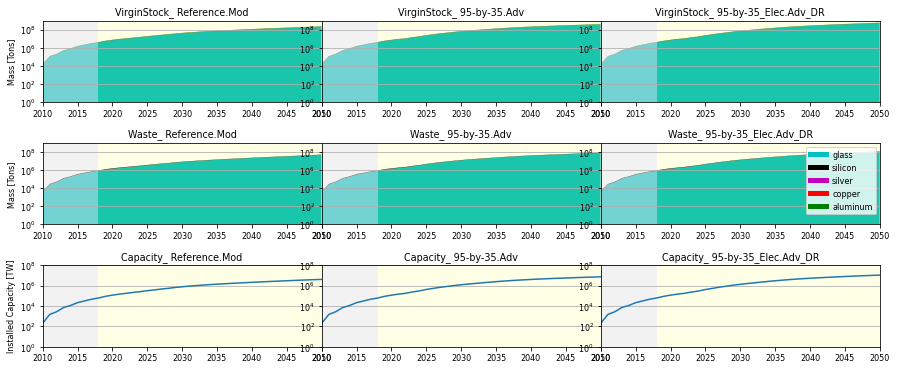

In [27]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

    
fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], UScum[keyw+materials[0]+'_'+obj.name], 
                                                          UScum[keyw+materials[1]+'_'+obj.name], 
                                                          UScum[keyw+materials[2]+'_'+obj.name], 
                                                          UScum[keyw+materials[3]+'_'+obj.name], 
                                                          UScum[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+obj.name]/1e6)
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([1e0, 10e8])
    axs[i+3].set_ylim([1e0, 10e8])
    axs[i+6].set_ylim([1e0, 10e7])

    axs[i].set_yscale('log')
    axs[i+3].set_yscale('log')
    axs[i+6].set_yscale('log')
    
    
axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[6].set_ylabel('Installed Capacity [TW]')
axs[5].legend(materials)


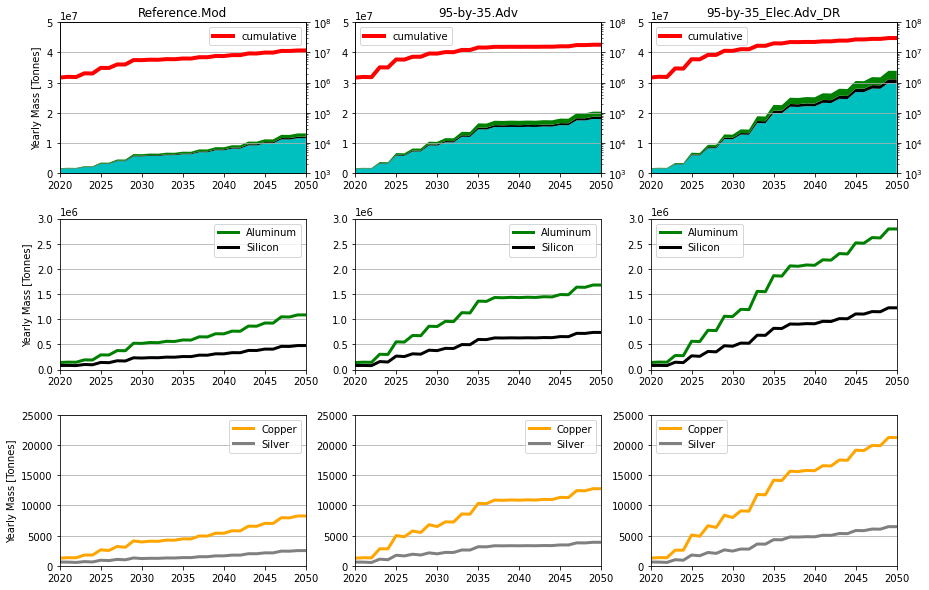

In [28]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
i = 0

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
#    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
 #   axs[i].plot([],[],color='c', label='glass', linewidth=5)
 #   axs[i].plot([],[],color='k', label='silicon', linewidth=5)
 #   axs[i].plot([],[],color='m', label='silver', linewidth=5)
 #   axs[i].plot([],[],color='r', label='copper', linewidth=5)
 #   axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                      USyearly[keyw+materials[1]+'_'+obj.name], 
                                                      USyearly[keyw+materials[2]+'_'+obj.name], 
                                                      USyearly[keyw+materials[3]+'_'+obj.name], 
                                                      USyearly[keyw+materials[4]+'_'+obj.name], 
                                                      colors=['c','k','gray','orange', 'g'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    axs[i].set_title(obj.name)
    #axs[i].legend(materials)

    i += 1 

# 2nd axis plot
i = 0
for kk in range(0, 3):

    obj = SFScenarios[kk]
    ax2=axs[i].twinx()
    ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
             color = 'r', linewidth=4.0, label='cumulative')
    #axs[i].ylabel('Mass [Tons]')
 #   axs[i].set_xlim([2010, 2050])
  #  axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    ax2.set_yscale('log')
    ax2.set_ylim([1e3, 1e8])
    i += 1 

    ax2.legend()


i = 3
# ROW 2, Aluminum and Silicon:
# Loop over SF Scenarios
for kk in range(0, 3):


    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[4]+'_'+obj.name], color='g', lw=3, label='Aluminum')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[4]+'_'+obj.name], 
 #                   color='g', lw=3, alpha=.6)
    
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[1]+'_'+obj.name], color='k', lw=3, label='Silicon')
   # axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[1]+'_'+obj.name], 
   #                 color='k', lw=3)# alpha=.3)


    # silicon aluminum 'k ''g'
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    axs[i].legend()

    i += 1 



# ROW 3:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[3]+'_'+obj.name], color='orange', lw=3, label='Copper')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[3]+'_'+obj.name], 
  #                  color='orange', lw=3)# alpha=.3)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[2]+'_'+obj.name], color='gray', lw=3, label='Silver')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[2]+'_'+obj.name], 
 #                   color='gray', lw=3)# , alpha=.6)
    
    
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    axs[i].legend()
    
    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([0, 5e7])
    axs[i+3].set_ylim([0, 3e6])
    axs[i+6].set_ylim([0, 2.5e4])

    #axs[i+3].set_ylim([1e0, 10e8])
    #axs[i+6].set_ylim([1e0, 5e6])

#    axs[i+3].set_yscale('log')
#    axs[i+6].set_yscale('log')

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
#axs[5].legend(materials)
    
axs[0].set_ylabel('Yearly Mass [Tonnes]')
axs[3].set_ylabel('Yearly Mass [Tonnes]')
axs[6].set_ylabel('Yearly Mass [Tonnes]')

#axs[8].legend(materials)

fig.savefig(title_Method+' Fig_3x3_MaterialNeeds.png', dpi=600)

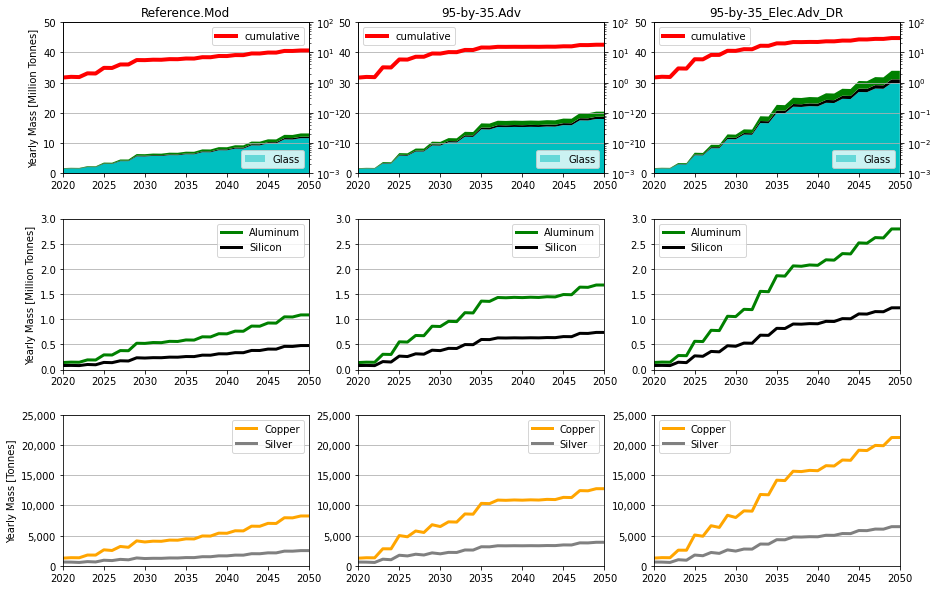

In [29]:
import matplotlib as mpl

plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
i = 0

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='c', alpha=0.5, label='Glass')
#    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
 #   axs[i].plot([],[],color='c', label='glass', linewidth=5)
 #   axs[i].plot([],[],color='k', label='silicon', linewidth=5)
 #   axs[i].plot([],[],color='m', label='silver', linewidth=5)
 #   axs[i].plot([],[],color='r', label='copper', linewidth=5)
 #   axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name]/1e6, 
                                                      USyearly[keyw+materials[1]+'_'+obj.name]/1e6, 
                                                      USyearly[keyw+materials[2]+'_'+obj.name]/1e6, 
                                                      USyearly[keyw+materials[3]+'_'+obj.name]/1e6, 
                                                      USyearly[keyw+materials[4]+'_'+obj.name]/1e6, 
                                                      colors=['c','k','gray','orange', 'g'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    axs[i].set_title(obj.name)
    axs[i].legend(loc='lower right')

    #axs[i].legend(materials)

    i += 1 

# 2nd axis plot
i = 0
for kk in range(0, 3):

    obj = SFScenarios[kk]
    ax2=axs[i].twinx()
    ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name]/1e6, 
             color = 'r', linewidth=4.0, label='cumulative')
    #axs[i].ylabel('Mass [Tons]')
 #   axs[i].set_xlim([2010, 2050])
  #  axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    ax2.set_yscale('log')
    ax2.set_ylim([1e3/1e6, 1e8/1e6])
    i += 1 

    ax2.legend()


i = 3
# ROW 2, Aluminum and Silicon:
# Loop over SF Scenarios
for kk in range(0, 3):


    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[4]+'_'+obj.name]/1e6, color='g', lw=3, label='Aluminum')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[4]+'_'+obj.name], 
 #                   color='g', lw=3, alpha=.6)
    
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[1]+'_'+obj.name]/1e6, color='k', lw=3, label='Silicon')
   # axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[1]+'_'+obj.name], 
   #                 color='k', lw=3)# alpha=.3)


    # silicon aluminum 'k ''g'
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    axs[i].legend()

    i += 1 



# ROW 3:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[3]+'_'+obj.name], color='orange', lw=3, label='Copper')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[3]+'_'+obj.name], 
  #                  color='orange', lw=3)# alpha=.3)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[2]+'_'+obj.name], color='gray', lw=3, label='Silver')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[2]+'_'+obj.name], 
 #                   color='gray', lw=3)# , alpha=.6)
    
    
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    axs[i].legend()
    axs[i].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([0, 5e7/1e6])
    axs[i+3].set_ylim([0, 3e6/1e6])
    axs[i+6].set_ylim([0, 2.5e4])

    #axs[i+3].set_ylim([1e0, 10e8])
    #axs[i+6].set_ylim([1e0, 5e6])

#    axs[i+3].set_yscale('log')
#    axs[i+6].set_yscale('log')

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
#axs[5].legend(materials)
    
axs[0].set_ylabel('Yearly Mass [Million Tonnes]')
axs[3].set_ylabel('Yearly Mass [Million Tonnes]')
axs[6].set_ylabel('Yearly Mass [Tonnes]')

#axs[8].legend(materials)

fig.savefig(title_Method+' Fig_3x3_MaterialNeeds.png', dpi=600)

## Mining Capacity + Virgin Needs Plot

In [30]:
mining2020_aluminum = 65267000
mining2020_silver = 22260
mining2020_copper = 20000000
mining2020_silicon = 8000000

Text(0, 0.5, 'Yearly Mass [Tonnes]')

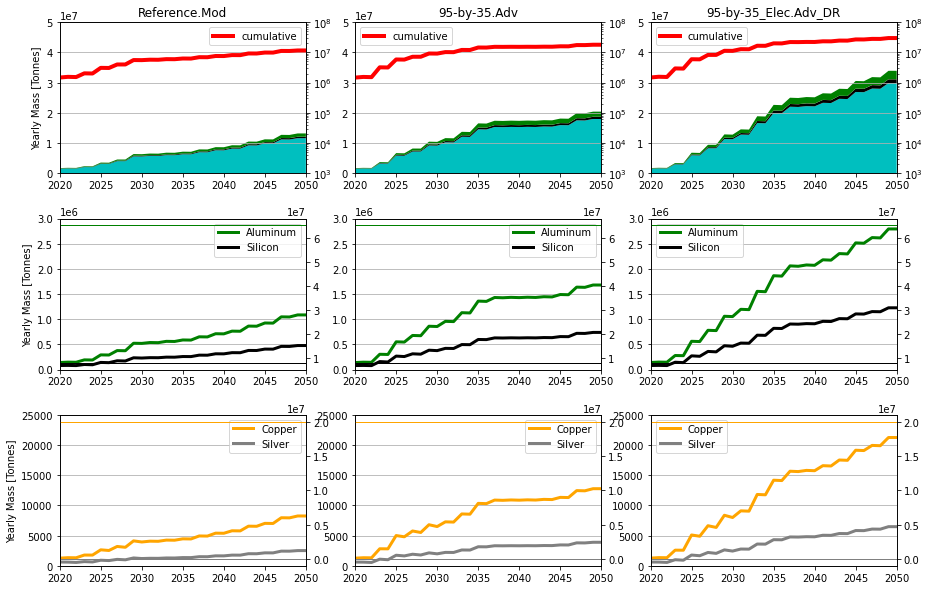

In [31]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
i = 0

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
#    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
 #   axs[i].plot([],[],color='c', label='glass', linewidth=5)
 #   axs[i].plot([],[],color='k', label='silicon', linewidth=5)
 #   axs[i].plot([],[],color='m', label='silver', linewidth=5)
 #   axs[i].plot([],[],color='r', label='copper', linewidth=5)
 #   axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                      USyearly[keyw+materials[1]+'_'+obj.name], 
                                                      USyearly[keyw+materials[2]+'_'+obj.name], 
                                                      USyearly[keyw+materials[3]+'_'+obj.name], 
                                                      USyearly[keyw+materials[4]+'_'+obj.name], 
                                                      colors=['c','k','gray','orange', 'g'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    axs[i].set_title(obj.name)
    #axs[i].legend(materials)

    i += 1 

# 2nd axis plot
i = 0
for kk in range(0, 3):

    obj = SFScenarios[kk]
    ax2=axs[i].twinx()
    ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
             color = 'r', linewidth=4.0, label='cumulative')
    #axs[i].ylabel('Mass [Tons]')
 #   axs[i].set_xlim([2010, 2050])
  #  axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    ax2.set_yscale('log')
    ax2.set_ylim([1e3, 1e8])
    i += 1 

    ax2.legend()


i = 3
# ROW 2, Aluminum and Silicon:
# Loop over SF Scenarios
for kk in range(0, 3):


    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[4]+'_'+obj.name], color='g', lw=3, label='Aluminum')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[4]+'_'+obj.name], 
 #                   color='g', lw=3, alpha=.6)
    
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[1]+'_'+obj.name], color='k', lw=3, label='Silicon')
   # axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[1]+'_'+obj.name], 
   #                 color='k', lw=3)# alpha=.3)


    # silicon aluminum 'k ''g'
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    axs[i].legend()

    ax2=axs[i].twinx()
    ax2.axhline(mining2020_aluminum, color = 'g', linestyle='-', linewidth=1.0, label='Production Al')
    ax2.axhline(mining2020_silicon, color = 'k', linestyle='-', linewidth=1.0, label='Production Si')

    i += 1 



# ROW 3:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[3]+'_'+obj.name], color='orange', lw=3, label='Copper')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[3]+'_'+obj.name], 
  #                  color='orange', lw=3)# alpha=.3)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[2]+'_'+obj.name], color='gray', lw=3, label='Silver')
 #   axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[2]+'_'+obj.name], 
 #                   color='gray', lw=3)# , alpha=.6)
    
    
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    axs[i].legend()

    ax2=axs[i].twinx()
    ax2.axhline(mining2020_copper, color = 'orange', linestyle='-', linewidth=1.0, label='Production Copper')
    ax2.axhline(mining2020_silver, color = 'gray', linestyle='-', linewidth=1.0, label='Production Silver')
    
    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([0, 5e7])
    axs[i+3].set_ylim([0, 3e6])
    axs[i+6].set_ylim([0, 2.5e4])

    #axs[i+3].set_ylim([1e0, 10e8])
    #axs[i+6].set_ylim([1e0, 5e6])

#    axs[i+3].set_yscale('log')
#    axs[i+6].set_yscale('log')

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
#axs[5].legend(materials)
    
axs[0].set_ylabel('Yearly Mass [Tonnes]')
axs[3].set_ylabel('Yearly Mass [Tonnes]')
axs[6].set_ylabel('Yearly Mass [Tonnes]')

#axs[8].legend(materials)


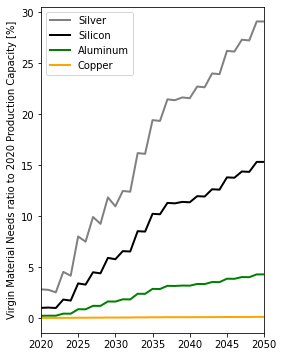

In [32]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(1,1, figsize=(4, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
i = 0

obj = SFScenarios[2]
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# ROW 2, Aluminum and Silicon:        g-  4 aluminum k - 1 silicon   orange - 3 copper  gray - 2 silver
axs.plot(USyearly[keyw+materials[2]+'_'+obj.name]*100/mining2020_silver, 
         color = 'gray', linewidth=2.0, label='Silver')
axs.plot(USyearly[keyw+materials[1]+'_'+obj.name]*100/mining2020_silicon, 
         color = 'k', linewidth=2.0, label='Silicon')
axs.plot(USyearly[keyw+materials[4]+'_'+obj.name]*100/mining2020_aluminum, 
         color = 'g', linewidth=2.0, label='Aluminum')
axs.plot(USyearly[keyw+materials[3]+'_'+obj.name]*100/mining2020_copper, 
         color = 'orange', linewidth=2.0, label='Copper')

axs.set_xlim([2020,2050])
axs.legend()
#axs.set_yscale('log')

axs.set_ylabel('Virgin Material Needs ratio to 2020 Production Capacity [%]')

fig.savefig(title_Method+' Fig_1x1_MaterialNeeds Ratio to Production.png', dpi=600)

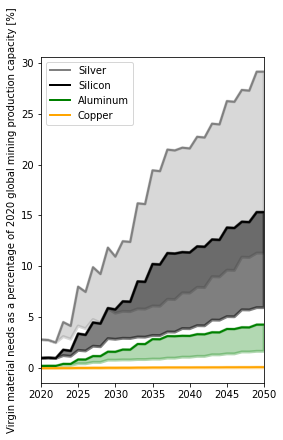

In [33]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(1,1, figsize=(4, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
i = 0

obj = SFScenarios[2].name
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# ROW 2, Aluminum and Silicon:        g-  4 aluminum k - 1 silicon   orange - 3 copper  gray - 2 silver
axs.plot(USyearly[keyw+materials[2]+'_'+SFScenarios[2].name]*100/mining2020_silver, 
         color = 'gray', linewidth=2.0, label='Silver')
axs.fill_between(USyearly.index, USyearly[keyw+materials[2]+'_'+SFScenarios[0].name]*100/mining2020_silver, USyearly[keyw+materials[2]+'_'+SFScenarios[2].name]*100/mining2020_silver,
                   color='gray', lw=3, alpha=.3)
    
axs.plot(USyearly[keyw+materials[1]+'_'+SFScenarios[2].name]*100/mining2020_silicon, 
         color = 'k', linewidth=2.0, label='Silicon')
axs.fill_between(USyearly.index, USyearly[keyw+materials[1]+'_'+SFScenarios[0].name]*100/mining2020_silicon, 
                                USyearly[keyw+materials[1]+'_'+SFScenarios[2].name]*100/mining2020_silicon,
                   color='k', lw=3, alpha=.5)

axs.plot(USyearly[keyw+materials[4]+'_'+SFScenarios[2].name]*100/mining2020_aluminum, 
         color = 'g', linewidth=2.0, label='Aluminum')

axs.fill_between(USyearly.index, USyearly[keyw+materials[4]+'_'+SFScenarios[0].name]*100/mining2020_aluminum, 
                                USyearly[keyw+materials[4]+'_'+SFScenarios[2].name]*100/mining2020_aluminum,
                   color='g', lw=3, alpha=.3)


axs.plot(USyearly[keyw+materials[3]+'_'+SFScenarios[2].name]*100/mining2020_copper, 
         color = 'orange', linewidth=2.0, label='Copper')

axs.fill_between(USyearly.index, USyearly[keyw+materials[3]+'_'+SFScenarios[0].name]*100/mining2020_copper, 
                                USyearly[keyw+materials[3]+'_'+SFScenarios[2].name]*100/mining2020_copper,
                   color='orange', lw=3, alpha=.3)

axs.set_xlim([2020,2050])
axs.legend()
#axs.set_yscale('log')

axs.set_ylabel('Virgin material needs as a percentage of 2020 global mining production capacity [%]')

fig.savefig(title_Method+' Fig_1x1_MaterialNeeds Ratio to Production.png', dpi=600)

# TABLES 

In [34]:
USyearlysig3 = USyearly.copy()
USyearlysig3 = USyearlysig3.drop(USyearlysig3.index[0])
N = 2

USyearlysig3 = USyearlysig3.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
USyearlysig3 = USyearlysig3.applymap(lambda x: int(x))
USyearlysig3.head()
#for col in USyearlysig3:
#    USyearlysig3[col].apply(lambda x: round(x, N - int(np.floor(np.log(abs(x))))))


,Waste_glass_Reference.Mod,Waste_silicon_Reference.Mod,Waste_silver_Reference.Mod,Waste_copper_Reference.Mod,Waste_aluminum_Reference.Mod,Waste_Module_Reference.Mod,Waste_glass_95-by-35.Adv,Waste_silicon_95-by-35.Adv,Waste_silver_95-by-35.Adv,Waste_copper_95-by-35.Adv,...,VirginStock_Module_95-by-35.Adv,VirginStock_glass_95-by-35_Elec.Adv_DR,VirginStock_silicon_95-by-35_Elec.Adv_DR,VirginStock_silver_95-by-35_Elec.Adv_DR,VirginStock_copper_95-by-35_Elec.Adv_DR,VirginStock_aluminum_95-by-35_Elec.Adv_DR,VirginStock_Module_95-by-35_Elec.Adv_DR,Capacity_Reference.Mod,Capacity_95-by-35.Adv,Capacity_95-by-35_Elec.Adv_DR
year,,,,,,,,,,,,,,,,,,,,,
2010,1760,312,2,0,21,2100,1760,312,2,0,...,8540,7230,599,10,4,705,8540,207000000,207000000,207000000
2011,21300,3730,24,6,256,25300,21300,3730,24,6,...,103000,87400,7190,109,50,8520,103000,1490000000,1490000000,1490000000
2012,20500,3730,18,6,246,24500,20500,3730,18,6,...,99500,84100,7070,84,49,8200,99500,2760000000,2760000000,2760000000
2013,66000,11800,44,20,821,78800,66000,11800,44,20,...,333000,283000,23000,197,163,27400,333000,7100000000,7100000000,7100000000
2014,64600,11300,39,19,787,76700,64600,11300,39,19,...,325000,276000,21900,175,157,26200,325000,11400000000,11400000000,11400000000


In [35]:
UScumsig3 = UScum.copy()
UScumsig3 = UScumsig3.drop(UScumsig3.index[0])
N = 2

UScumsig3 = UScumsig3.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
UScumsig3 = UScumsig3.applymap(lambda x: int(x))
UScumsig3.head()

,Waste_glass_Reference.Mod,Waste_silicon_Reference.Mod,Waste_silver_Reference.Mod,Waste_copper_Reference.Mod,Waste_aluminum_Reference.Mod,Waste_Module_Reference.Mod,Waste_glass_95-by-35.Adv,Waste_silicon_95-by-35.Adv,Waste_silver_95-by-35.Adv,Waste_copper_95-by-35.Adv,...,VirginStock_Module_95-by-35.Adv,VirginStock_glass_95-by-35_Elec.Adv_DR,VirginStock_silicon_95-by-35_Elec.Adv_DR,VirginStock_silver_95-by-35_Elec.Adv_DR,VirginStock_copper_95-by-35_Elec.Adv_DR,VirginStock_aluminum_95-by-35_Elec.Adv_DR,VirginStock_Module_95-by-35_Elec.Adv_DR,Capacity_Reference.Mod,Capacity_95-by-35.Adv,Capacity_95-by-35_Elec.Adv_DR
year,,,,,,,,,,,,,,,,,,,,,
2010,3660,987,7,1,42,4700,3660,987,7,1,...,17800,14700,1570,34,8,1430,17800,311000000,311000000,311000000
2011,24900,4710,32,7,298,30000,24900,4710,32,7,...,121000,102000,8760,143,59,9950,121000,1800000000,1800000000,1800000000
2012,45400,8450,51,13,544,54500,45400,8450,51,13,...,221000,186000,15800,228,108,18100,221000,4560000000,4560000000,4560000000
2013,111000,20300,95,34,1370,133000,111000,20300,95,34,...,554000,469000,38800,424,272,45500,554000,11700000000,11700000000,11700000000
2014,176000,31600,134,54,2150,210000,176000,31600,134,54,...,878000,745000,60700,599,428,71700,878000,23100000000,23100000000,23100000000


In [36]:
materials = ['Module', 'glass', 'aluminum', 'copper', 'silicon', 'silver']

print(" Metric Tonnes Installed in field in 2030")
print(" ######################################### \n")
#Loop over scenarios
for kk in range (0, 3):
    obj = SFScenarios[kk]
    print("SCENARIO :", obj.name)

    print("********************************")
    print("********************************")

    modulemat = 0
    for ii in range(0, len(materials)):
        installedmat = (UScumsig3['VirginStock_'+materials[ii]+'_'+obj.name].loc[2030]-
              UScumsig3['Waste_'+materials[ii]+'_'+obj.name].loc[2030])
        print(materials[ii], ':', round(installedmat/1000)*1000, 'tons')

    print("Capacity in Year 2030 [GW]:", round(USyearlysig3['Capacity_'+obj.name].loc[2030]/1e9))
    print("Capacity in Year 2050 [GW]:", round(USyearlysig3['Capacity_'+obj.name].loc[2050]/1e9))
    print("****************************\n")

 Metric Tonnes Installed in field in 2030
 ######################################### 

SCENARIO : Reference.Mod
********************************
********************************
Module : 36070000 tons
glass : 31250000 tons
aluminum : 3552000 tons
copper : 27000 tons
silicon : 1219000 tons
silver : 9000 tons
Capacity in Year 2030 [GW]: 776
Capacity in Year 2050 [GW]: 4090
****************************

SCENARIO : 95-by-35.Adv
********************************
********************************
Module : 55800000 tons
glass : 48500000 tons
aluminum : 5502000 tons
copper : 42000 tons
silicon : 1852000 tons
silver : 14000 tons
Capacity in Year 2030 [GW]: 1220
Capacity in Year 2050 [GW]: 7320
****************************

SCENARIO : 95-by-35_Elec.Adv_DR
********************************
********************************
Module : 61500000 tons
glass : 53400000 tons
aluminum : 6065000 tons
copper : 46000 tons
silicon : 2020000 tons
silver : 15000 tons
Capacity in Year 2030 [GW]: 1350
Capacity in Yea

In [37]:
print(" VIRGIN STOCK Yearly Needs ")
print(" **************************")
for kk in range(0, 3):
    obj = SFScenarios[kk]
    print(obj.name)
    filter_col = [col for col in USyearlysig3 if (col.startswith('VirginStock_') and col.endswith(obj.name)) ]
    display(USyearlysig3[filter_col].loc[[2030, 2040, 2050]])
    print("\n\n")
    
print(" VIRGIN STOCK Cumulative Needs ")
print(" ***************************** ")
for kk in range(0, 3):
    obj = SFScenarios[kk]
    print(obj.name)
    filter_col = [col for col in UScumsig3 if (col.startswith('VirginStock_') and col.endswith(obj.name)) ]
    display(UScumsig3[filter_col].loc[[2030, 2040, 2050]])
    print("\n\n")

 VIRGIN STOCK Yearly Needs 
 **************************
Reference.Mod


,VirginStock_glass_Reference.Mod,VirginStock_silicon_Reference.Mod,VirginStock_silver_Reference.Mod,VirginStock_copper_Reference.Mod,VirginStock_aluminum_Reference.Mod,VirginStock_Module_Reference.Mod
year,,,,,,
2030,5540000,228000,1200,3940,519000,6300000
2040,7570000,311000,1640,5390,708000,8600000
2050,11600000,476000,2520,8250,1080000,13200000





95-by-35.Adv


,VirginStock_glass_95-by-35.Adv,VirginStock_silicon_95-by-35.Adv,VirginStock_silver_95-by-35.Adv,VirginStock_copper_95-by-35.Adv,VirginStock_aluminum_95-by-35.Adv,VirginStock_Module_95-by-35.Adv
year,,,,,,
2030,9130000,375000,1980,6500,854000,10400000
2040,15300000,627000,3310,10900,1430000,17300000
2050,17900000,737000,3890,12800,1680000,20400000





95-by-35_Elec.Adv_DR


,VirginStock_glass_95-by-35_Elec.Adv_DR,VirginStock_silicon_95-by-35_Elec.Adv_DR,VirginStock_silver_95-by-35_Elec.Adv_DR,VirginStock_copper_95-by-35_Elec.Adv_DR,VirginStock_aluminum_95-by-35_Elec.Adv_DR,VirginStock_Module_95-by-35_Elec.Adv_DR
year,,,,,,
2030,11200000,461000,2440,7990,1050000,12800000
2040,22100000,909000,4800,15700,2070000,25100000
2050,29900000,1230000,6480,21200,2790000,33900000





 VIRGIN STOCK Cumulative Needs 
 ***************************** 
Reference.Mod


,VirginStock_glass_Reference.Mod,VirginStock_silicon_Reference.Mod,VirginStock_silver_Reference.Mod,VirginStock_copper_Reference.Mod,VirginStock_aluminum_Reference.Mod,VirginStock_Module_Reference.Mod
year,,,,,,
2030,39000000,1870000,12300,30900,3670000,44600000
2040,104000000,4530000,26400,77100,9740000,118000000
2050,204000000,8630000,48100,148000,19100000,232000000





95-by-35.Adv


,VirginStock_glass_95-by-35.Adv,VirginStock_silicon_95-by-35.Adv,VirginStock_silver_95-by-35.Adv,VirginStock_copper_95-by-35.Adv,VirginStock_aluminum_95-by-35.Adv,VirginStock_Module_95-by-35.Adv
year,,,,,,
2030,60400000,2800000,17900,47800,5680000,68900000
2040,195000000,8320000,47100,144000,18300000,222000000
2050,359000000,15100000,82800,260000,33600000,408000000





95-by-35_Elec.Adv_DR


,VirginStock_glass_95-by-35_Elec.Adv_DR,VirginStock_silicon_95-by-35_Elec.Adv_DR,VirginStock_silver_95-by-35_Elec.Adv_DR,VirginStock_copper_95-by-35_Elec.Adv_DR,VirginStock_aluminum_95-by-35_Elec.Adv_DR,VirginStock_Module_95-by-35_Elec.Adv_DR
year,,,,,,
2030,66500000,3050000,19400,52300,6260000,75900000
2040,253000000,10700000,59900,185000,23700000,288000000
2050,518000000,21600000,117000,374000,48500000,589000000


In [38]:
print(" WASTE CUMULATIVE RESULTS [Tonnes] ")
print(" ******************************************")
filter_col = [col for col in UScumsig3 if (col.startswith('Waste_Module')) ]
display(UScumsig3[filter_col].loc[[2016,2020,2030, 2040, 2050]])


 WASTE CUMULATIVE RESULTS [Tonnes] 
 ******************************************


,Waste_Module_Reference.Mod,Waste_Module_95-by-35.Adv,Waste_Module_95-by-35_Elec.Adv_DR
year,,,
2016,526000,526000,526000
2020,1590000,1590000,1600000
2030,8530000,13100000,14400000
2040,23500000,42000000,53800000
2050,52300000,86000000,118000000


In [39]:
# Same as above cell but in more lines
"""
materials = ['glass', 'aluminum', 'copper', 'silicon', 'silver']

print(" WASTE CUMULATIVE RESULTS ")
print(" ***********************")
#Loop over scenarios
for kk in range (0, 3):
    obj = SFScenarios[kk]
    print("SCENARIO :", obj.name)
    modulewaste2016 = 0
    modulewaste2020 = 0
    modulewaste2030 = 0
    modulewaste2040 = 0
    modulewaste2050 = 0

    for ii in range(0, len(materials)):
        modulewaste2016 +=UScum['Waste_'+materials[ii]+'_'+obj.name].iloc[7]
        modulewaste2020 +=UScum['Waste_'+materials[ii]+'_'+obj.name].iloc[11]
        modulewaste2030 +=UScum['Waste_'+materials[ii]+'_'+obj.name].iloc[21]
        modulewaste2040 +=UScum['Waste_'+materials[ii]+'_'+obj.name].iloc[31]
        modulewaste2050 +=UScum['Waste_'+materials[ii]+'_'+obj.name].iloc[41]

    print('Module Waste 2016:', round(modulewaste2016/1000)*1000, 'tons') 
    print('Module Waste 2020:', round(modulewaste2020/1000)*1000, 'tons') 
    print('Module Waste 2030:', round(modulewaste2030/1000)*1000, 'tons') 
    print('Module Waste 2040:', round(modulewaste2040/1000)*1000, 'tons') 
    print('Module Waste 2050:', round(modulewaste2050/1000)*1000, 'tons') 

    print("****************************")
"""
pass

## DWARAKS PLOT

Text(0, 0.5, 'Mass [tons]')

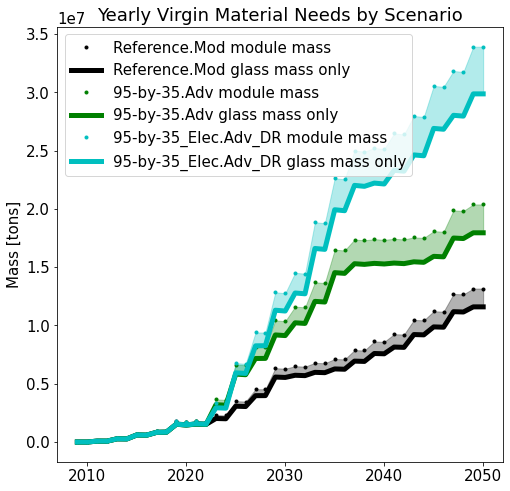

In [40]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, ax = plt.subplots()

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1
kk = 0
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
plt.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'k.', linewidth=5, label=obj.name+' module mass')
plt.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'k', linewidth=5, label=obj.name+' glass mass only')
ax.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
plt.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g.', linewidth=5, label=obj.name+' module mass')
plt.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'g', linewidth=5, label=obj.name+' glass mass only')
ax.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='g', alpha=0.3,
                 interpolate=True)

# SCENARIO 2
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
plt.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c.', linewidth=5, label=obj.name+' module mass')
plt.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'c', linewidth=5, label=obj.name+' glass mass only')

ax.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

# color = 'C1'
plt.legend()
plt.title('Yearly Virgin Material Needs by Scenario')
plt.ylabel('Mass [tons]')
    
    

#### Organizing Cumulative 2050 material needs for Materials / Scenarios

In [41]:
#This is in the plots
"""
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050)
dfcumulations2050
"""
pass

#### Calculating Bottoms for stacked bar plots... ugh.

In [42]:
#This is in the plots
"""
dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']
"""
pass

##### Virgin Needs

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


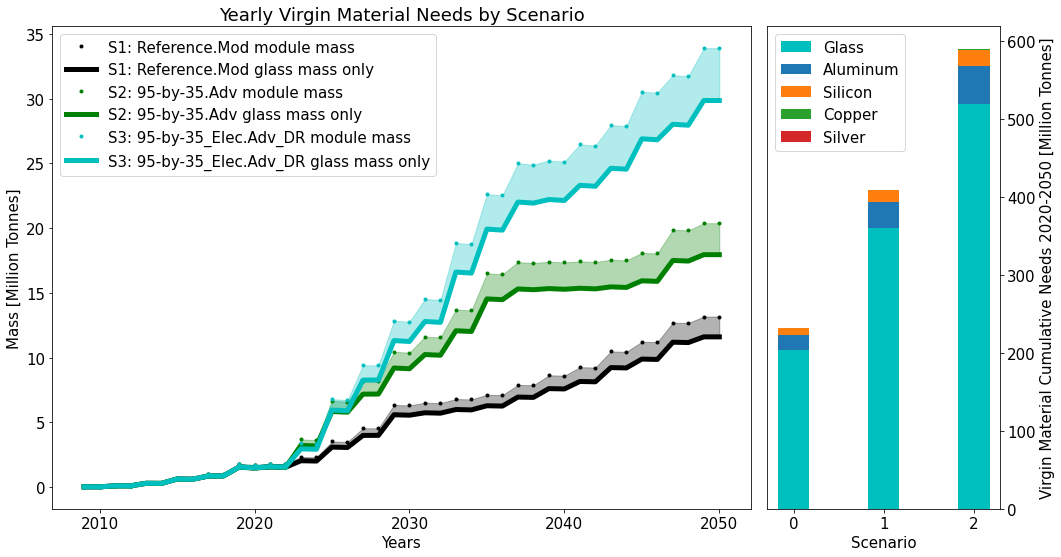

In [43]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']



f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'k.', linewidth=5, label='S1: '+obj.name+' module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'k', linewidth=5, label='S1: '+obj.name+' glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g.', linewidth=5, label='S2: '+obj.name+' module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'g', linewidth=5, label='S2: '+obj.name+' glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='g', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c.', linewidth=5, label='S3: '+obj.name+' module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'c', linewidth=5, label='S3: '+obj.name+' glass mass only')

a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Virgin Material Needs by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')

a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Virgin Material Cumulative Needs 2020-2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2', 'S3'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly Virgin Material Needs by Scenario and Cumulatives.png', dpi=600)

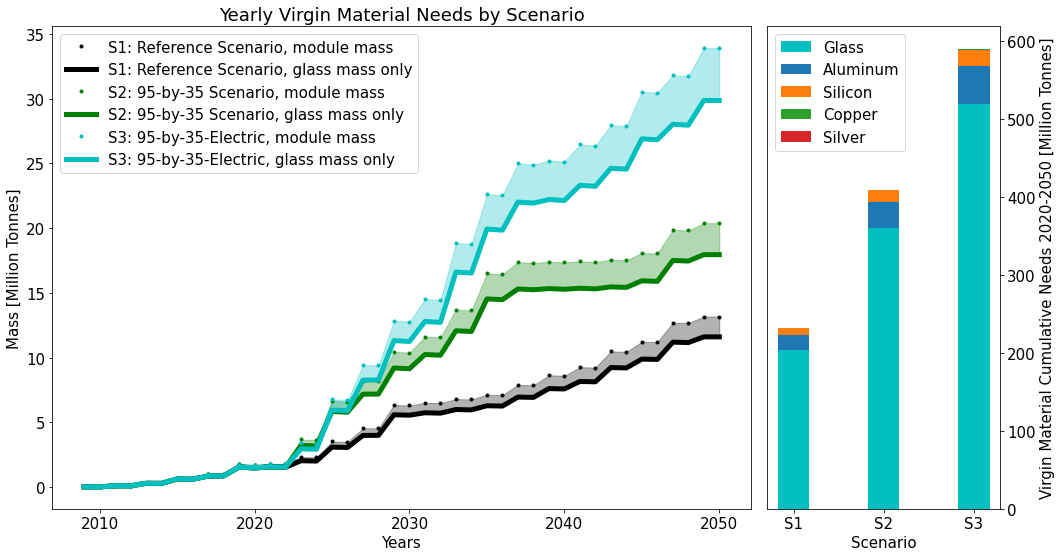

In [44]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']



f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'k.', linewidth=5, label='S1: Reference Scenario, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'k', linewidth=5, label='S1: Reference Scenario, glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g.', linewidth=5, label='S2: 95-by-35 Scenario, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'g', linewidth=5, label='S2: 95-by-35 Scenario, glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='g', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c.', linewidth=5, label='S3: 95-by-35-Electric, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'c', linewidth=5, label='S3: 95-by-35-Electric, glass mass only')

a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Virgin Material Needs by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')

a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Virgin Material Cumulative Needs 2020-2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind)
a1.set_xticklabels(['S1', 'S2', 'S3'])
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))


f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly Virgin Material Needs by Scenario and Cumulatives.png', dpi=600)

##### Waste

Waste_


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


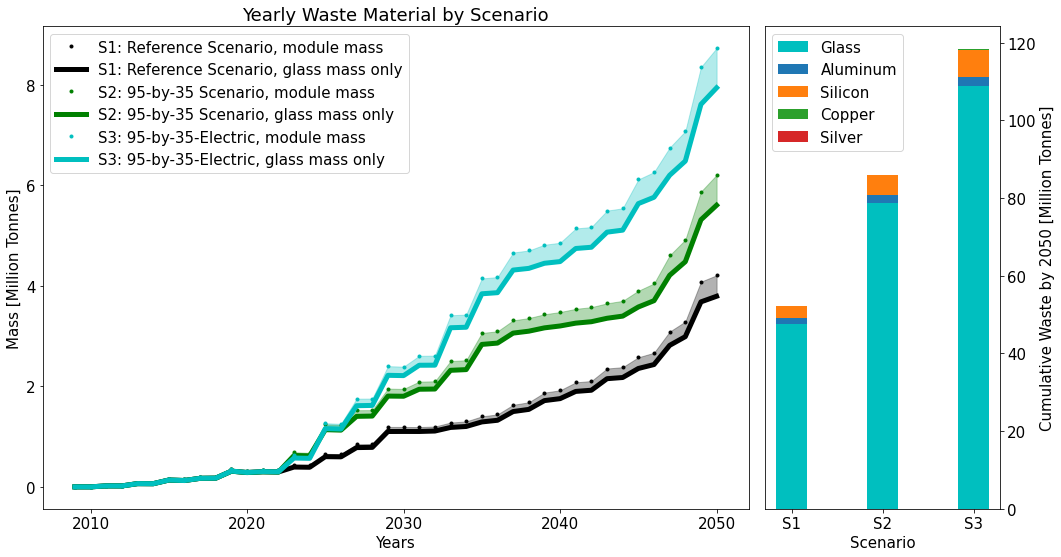

In [45]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
print(keyw)
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'k.', linewidth=5, label='S1: Reference Scenario, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'k', linewidth=5, label='S1: Reference Scenario, glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g.', linewidth=5, label='S2: 95-by-35 Scenario, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'g', linewidth=5, label='S2: 95-by-35 Scenario, glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='g', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c.', linewidth=5, label='S3: 95-by-35-Electric, module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'c', linewidth=5, label='S3: 95-by-35-Electric, glass mass only')

a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Waste Material by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')

a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050)
dfcumulations2050 = dfcumulations2050/1000000

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
             
a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative Waste by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2', 'S3'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))
a1.set_xticks(ind)
a1.set_xticklabels(['S1', 'S2', 'S3'])

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly WASTE by Scenario and Cumulatives.png', dpi=600)

##### Another option

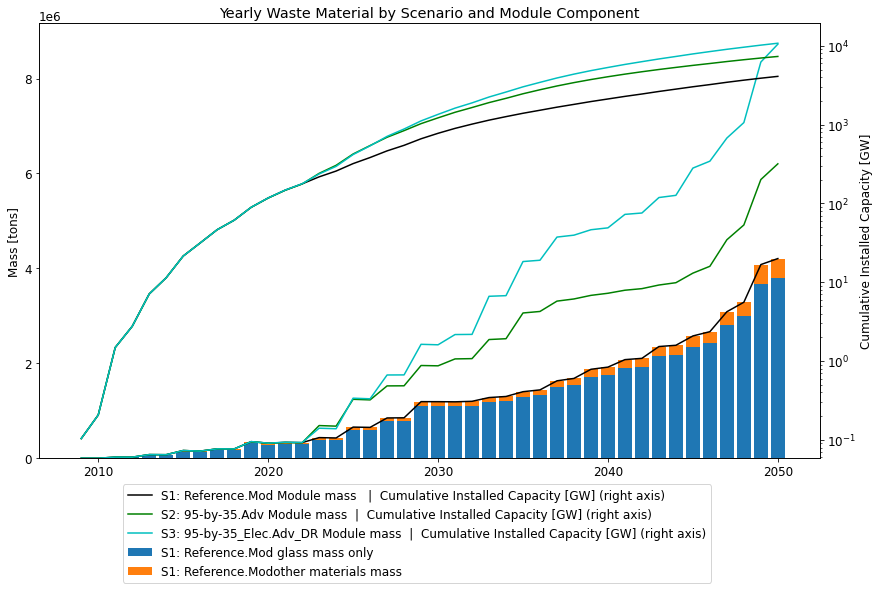

In [46]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (14, 8)
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, a0 = plt.subplots(1, 1)

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFScenarios[kk]

othermat = (USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
a0.bar(obj.scenario[STATEs[0]].data['year'], glassmat, label='S1: '+obj.name+' glass mass only')
a0.bar(obj.scenario[STATEs[0]].data['year'], othermat,bottom=glassmat, label='S1: '+obj.name+'other materials mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat,'k', label='S1: '+obj.name+' Module mass   |  Cumulative Installed Capacity [GW] (right axis)')

# SCENARIO 2 ***************
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g', label='S2: '+obj.name+' Module mass  |  Cumulative Installed Capacity [GW] (right axis)')



# SCENARIO 3***************
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c', label='S3: '+obj.name+' Module mass  |  Cumulative Installed Capacity [GW] (right axis)')



########################    
# SUBPLOT 2
########################
#######################
# Calculate    
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050)
dfcumulations2050

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


### Install Capacity

ax2=a0.twinx()
ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly['Capacity_'+SFScenarios[0].name]/1e9, 'k', label='S1: Cumulative Installed Capacity [GW] (right axis)')
ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly['Capacity_'+SFScenarios[1].name]/1e9, 'g', label='S2: Cumulative Installed Capacity [GW] (right axis)')
ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly['Capacity_'+SFScenarios[2].name]/1e9, 'c', label='S3: Cumulative Installed Capacity [GW] (right axis)')
ax2.set_yscale('log')
ax2.set_ylabel('Cumulative Installed Capacity [GW]')

a0.set_ylabel('Mass [tons]')
a0.set_title('Yearly Waste Material by Scenario and Module Component')
a0.legend(bbox_to_anchor=(0.10, -0.3), loc='lower left')
#ax2.legend()


# SAVE DATA FOR BILLY

### PCA vs. Cumulative Waste by 2050


In [47]:
UScumsig3 = UScumsig3.drop(UScumsig3.index[0])
N = 2

UScumsig3 = UScumsig3.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
UScumsig3 = UScumsig3.applymap(lambda x: int(x))
UScumsig3.head()

,Waste_glass_Reference.Mod,Waste_silicon_Reference.Mod,Waste_silver_Reference.Mod,Waste_copper_Reference.Mod,Waste_aluminum_Reference.Mod,Waste_Module_Reference.Mod,Waste_glass_95-by-35.Adv,Waste_silicon_95-by-35.Adv,Waste_silver_95-by-35.Adv,Waste_copper_95-by-35.Adv,...,VirginStock_Module_95-by-35.Adv,VirginStock_glass_95-by-35_Elec.Adv_DR,VirginStock_silicon_95-by-35_Elec.Adv_DR,VirginStock_silver_95-by-35_Elec.Adv_DR,VirginStock_copper_95-by-35_Elec.Adv_DR,VirginStock_aluminum_95-by-35_Elec.Adv_DR,VirginStock_Module_95-by-35_Elec.Adv_DR,Capacity_Reference.Mod,Capacity_95-by-35.Adv,Capacity_95-by-35_Elec.Adv_DR
year,,,,,,,,,,,,,,,,,,,,,
2011,24900,4710,32,7,298,30000,24900,4710,32,7,...,121000,102000,8760,143,59,9950,121000,1800000000,1800000000,1800000000
2012,45400,8450,51,13,544,54500,45400,8450,51,13,...,221000,186000,15800,228,108,18100,221000,4560000000,4560000000,4560000000
2013,111000,20300,95,34,1370,133000,111000,20300,95,34,...,554000,469000,38800,424,272,45500,554000,11700000000,11700000000,11700000000
2014,176000,31600,134,54,2150,210000,176000,31600,134,54,...,878000,745000,60700,599,428,71700,878000,23100000000,23100000000,23100000000
2015,313000,56600,209,103,3930,374000,313000,56600,209,103,...,1600000,1360000,110000,934,810,131000,1600000,44600000000,44600000000,44600000000


In [48]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(STATEs)):
            keywordsum.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=STATEs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist = scenariolist/1000000 # Converting to Metric Tons
scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 6 - STATE Cumulative2050 VirginMaterialNeeds_tons.csv')

In [49]:
scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' Appendix - Scenario 1 Virgin Material NEeds.csv')

In [50]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(STATEs)):
            keywordsum.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=STATEs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist = scenariolist/1000000 # Converting to Metric Tons
scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 7 - STATE Cumulative2050 Waste_tons.csv')

In [51]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][21])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][31])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][41])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 8 - STATE Yearly 2030 2040 2050 VirginMaterialNeeds_tons.csv')

In [52]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][21])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][31])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][41])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tonnes
scenariolist.to_csv(title_Method+' 9 - STATE Yearly 2030 2040 2050 Waste_tons.csv')

SFScenarios[kk].scenario[PCAs[zz]].data.year

Index 21 --> 2030

Index 31 --> 2040

Index 41 --> 2050

# APPENDIX TABLES

#### Table 1-3 Yearly Virgin Stock

In [53]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][21])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][31])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][41])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons


# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    scen = scen.sort_values(by='glass_2050', ascending=False)
    reduced = scen.iloc[0:23]
    new_row = pd.Series(data=scen.iloc[23::].sum(axis=0), name='OTHER STATES')
    new_row_2 = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
    reduced = reduced.append(new_row_2, ignore_index=False)
    reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
    reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Yearly Virgin Stock by State.csv')

#### Table 4-6 Cumulative Virgin Stock

In [54]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = pd.DataFrame()
    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []
        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:21].sum())
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:31].sum())
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:].sum())
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons

# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    scen = scen.sort_values(by='glass_2050', ascending=False)
    scen.sum(axis=0)
    reduced = scen.iloc[0:23]
    new_row = pd.Series(data=scen.iloc[23::].sum(axis=0), name='OTHER STATES')
    new_row_2 = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
    reduced = reduced.append(new_row_2, ignore_index=False)
    reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
    reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Cumulative Virgin Stock by State.csv')

#### Table 6-9 Cumulative Waste Stock

In [55]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = pd.DataFrame()
    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []
        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:21].sum())
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:31].sum())
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][0:].sum())
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons

# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    #scen = scen.sort_values(by='glass_2050', ascending=False)
    reduced = scen
    new_row = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
    #reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
    #reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Cumulative WASTE by State.csv')

#### Table 9-12 Yearly Waste Stock

In [56]:
#matplotlib.use('Agg')

NameError: name 'matplotlib' is not defined

In [57]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][21])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][31])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][41])
    
            # PLOT HERE
            # PLOT HERE
            if materials[ii] == 'glass':
                fig, axs = plt.subplots(figsize=(2, 1), facecolor='w', edgecolor='k')
                #axs.ioff()
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year, SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword]/1000000, 'k')
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[21], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][21]/1000000, 'r.',markersize=12)
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[31], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][31]/1000000, 'r.', markersize=12)
                axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[41], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][41]/1000000, 'r.', markersize=12)
                #plt.ylabel('Tonnes')
                axs.set_xlim([2020, 2052])
                #axs.set_visible(False)
                axs.axis('off')
                figtitle = title_Method+ ' ' + SFScenarios[kk].name + ' Fig_2x1_GLASS_Waste_'+STATEs[zz]+'.png'
                figtitle = os.path.join('SPARKPLOTS', figtitle)
                fig.savefig(figtitle, dpi=600)
                plt.close(fig) # This avoids the figure from displayig and getting all the warnings

        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons


# Loop over SF Scenarios
for kk in range(0, 3):
    filter_col = [col for col in scenariolist if (col.startswith(SFScenarios[kk].name)) ]
    scen = scenariolist[filter_col]
    scen.columns = scen.columns.str.lstrip(SFScenarios[kk].name+'_')  # strip suffix at the right end only.
    scen = scen.rename_axis('State')
    scen = scen.sort_values(by='State')
    reduced = scen
    new_row = pd.Series(data=scen.sum(axis=0), name='US TOTAL')
    reduced = reduced.append(new_row, ignore_index=False)
#   reduced = reduced.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#   reduced = reduced.applymap(lambda x: int(x))
    reduced.to_csv(title_Method+' Appendix - '+ SFScenarios[kk].name + ' Yearly Waste by State.csv')

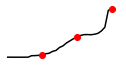

In [59]:
# PLOT HERE
fig, axs = plt.subplots(figsize=(2, 1), facecolor='w', edgecolor='k')
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year, SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword]/1000000, 'k')
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[21], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][21]/1000000, 'r.',markersize=12)
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[31], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][31]/1000000, 'r.', markersize=12)
axs.plot(SFScenarios[kk].scenario[STATEs[zz]].data.year.loc[41], SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][41]/1000000, 'r.', markersize=12)
#plt.ylabel('Tonnes')
axs.set_xlim([2020, 2052])
#axs.set_visible(False)
axs.axis('off')
fig.savefig(title_Method+' Fig_2x1_'+'MaterialNeeds.png', dpi=600)


In [60]:
SFScenarios[kk].scenario[STATEs[zz]].data

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,...,EOL_on_Year_36,EOL_on_Year_37,EOL_on_Year_38,EOL_on_Year_39,EOL_on_Year_40,EOL_on_Year_41,EoL_Collected,EoL_NotCollected,EoL_Recycled,EoL_NotRecycled_Landfilled
0,2009,3.600000,14.700000,25.0,30.0,0.3,30.0,97.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
1,2010,3.600000,15.100000,25.0,30.0,0.3,30.0,97.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.058518e-05,0.0,0.0
2,2011,61.250000,15.400000,25.0,30.0,0.3,30.0,97.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.026346e-03,0.0,0.0
3,2012,61.250000,16.000000,28.0,33.0,0.3,30.0,97.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.583108e-02,0.0,0.0
4,2013,329.250000,16.300000,28.0,33.0,0.3,30.0,97.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.283162e-01,0.0,0.0
5,2014,329.250000,17.000000,28.0,33.0,0.3,30.0,97.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,7.582354e-01,0.0,0.0
6,2015,1178.400000,17.500000,28.0,33.0,0.3,30.0,97.0,0.0,0.0,...,185141.118862,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.432221e+00,0.0,0.0
7,2016,1178.400000,17.700000,28.0,33.0,0.3,30.0,97.0,0.0,0.0,...,265265.507612,1.830491e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.243747e+01,0.0,0.0
8,2017,1970.700000,18.400000,28.0,33.0,0.3,30.0,97.0,0.0,0.0,...,721217.313641,4.267406e+05,2.944767e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.797784e+01,0.0,0.0
9,2018,1970.700000,19.200000,28.0,33.0,0.3,30.0,97.0,0.0,0.0,...,969438.413451,6.911666e+05,4.089598e+05,2.822068e+05,0.000000e+00,0.000000e+00,0.0,1.020232e+02,0.0,0.0


### SIZE WASTE COMPARISON


In [61]:
keyword='Cumulative_Area_disposed'

USyearly_Areadisp=pd.DataFrame()

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    foo = obj.scenario[STATEs[0]].data[keyword].copy()
    USyearly_Areadisp["Areadisp_"+obj.name] = foo

    # Loop over STATEs
    for jj in range (1, len(STATEs)): 
        print(jj, STATEs[jj])
        USyearly_Areadisp["Areadisp_"+obj.name] += obj.scenario[STATEs[jj]].data[keyword]



1 CA
2 VA
3 FL
4 MI
5 IN
6 KY
7 OH
8 PA
9 WV
10 NV
11 MD
12 DE
13 NJ
14 NY
15 VT
16 NH
17 MA
18 CT
19 RI
20 ME
21 ID
22 MT
23 WY
24 UT
25 AZ
26 NM
27 SD
28 CO
29 ND
30 NE
31 MN
32 IA
33 WI
34 TX
35 OK
36 OR
37 KS
38 MO
39 AR
40 LA
41 IL
42 MS
43 AL
44 TN
45 GA
46 SC
47 NC
1 CA
2 VA
3 FL
4 MI
5 IN
6 KY
7 OH
8 PA
9 WV
10 NV
11 MD
12 DE
13 NJ
14 NY
15 VT
16 NH
17 MA
18 CT
19 RI
20 ME
21 ID
22 MT
23 WY
24 UT
25 AZ
26 NM
27 SD
28 CO
29 ND
30 NE
31 MN
32 IA
33 WI
34 TX
35 OK
36 OR
37 KS
38 MO
39 AR
40 LA
41 IL
42 MS
43 AL
44 TN
45 GA
46 SC
47 NC
1 CA
2 VA
3 FL
4 MI
5 IN
6 KY
7 OH
8 PA
9 WV
10 NV
11 MD
12 DE
13 NJ
14 NY
15 VT
16 NH
17 MA
18 CT
19 RI
20 ME
21 ID
22 MT
23 WY
24 UT
25 AZ
26 NM
27 SD
28 CO
29 ND
30 NE
31 MN
32 IA
33 WI
34 TX
35 OK
36 OR
37 KS
38 MO
39 AR
40 LA
41 IL
42 MS
43 AL
44 TN
45 GA
46 SC
47 NC


In [66]:
UScum_Areadisp = USyearly_Areadisp.copy()
UScum_Areadisp = UScum_Areadisp.cumsum()

In [76]:
A = UScum['Waste_Module_95-by-35_Elec.Adv_DR'].iloc[-1]
#47700000 # tonnes cumulative by 2050
A = A*1000 # convert to kg
A = A/10.05599 # convert to m2 if each m2 is ~avg 10 kg
#A = A*2 # convert to area if each module is ~2 m2
B = A/1e6 # Convert to km 2
print(B)

11770.378809478436


In [77]:
A = UScum['Waste_Module_Reference.Mod'].iloc[-1]
#47700000 # tonnes cumulative by 2050
A = A*1000 # convert to kg
A = A/10.05599 # convert to m2 if each m2 is ~avg 10 kg
#A = A*2 # convert to area if each module is ~2 m2
A = A/1e6 # Convert to km 2
print(A)

5200.369666421476


In [78]:
print("Cumulative Area by 2050 of Waste PV Modules", UScum_Areadisp['Areadisp_Reference.Mod'].iloc[-1]/1e6, " km^2")
print("Cumulative Area by 2050 of Waste PV Modules", UScum_Areadisp['Areadisp_95-by-35_Elec.Adv_DR'].iloc[-1]/1e6, " km^2")
print("Cumulative Area by 2050 of Waste PV Material", A, " km$^2$")
print("Cumulative Area by 2050 of Waste PV Material", B, " km$^2$")

Cumulative Area by 2050 of Waste PV Modules 1067.021740915009  km^2
Cumulative Area by 2050 of Waste PV Modules 1324.48141983922  km^2
Cumulative Area by 2050 of Waste PV Material 5200.369666421476  km$^2$
Cumulative Area by 2050 of Waste PV Material 11770.378809478436  km$^2$


In [79]:
(USyearly['Waste_Module_Reference.Mod'].iloc[-1]  # Tonnes

4207949.000127743

In [80]:
UScum['Waste_Module_Reference.Mod'].iloc[-1]   # Tonnes

52294865.36183769

In [81]:
52294865.36183769/1e6

52.294865361837694